In [276]:
#The following function generates a sample from a probability distribution. You may choose to ignore the logic. Just see how to use it.

import sys
import random
import numpy as np
import copy
import math
import pandas as pd
def weighted_choice(v, p):
   total = sum(p)
   r = random.uniform(0, total)
   upto = 0
   for c, w in zip(v,p):
      if upto + w >= r:
         return c
      upto += w
   assert False, "Shouldn't get here"

In [277]:
#Creating a class for MDP environment definition that takes Transition Probability Matrix p(s'|s,a) and reward E[R_{t+1} | s,a,s'] as inputs


class MDP:
    def __init__(self, transition_probs, initial_state = 0):
        self._check_param_consistency(transition_probs)
        self._transition_probs = transition_probs
        self._initial_state = initial_state
        self.n_states = len(transition_probs)
        self.g25 = [0,5,0,0,5,0,0,0]
        self.g75 = [0,5,5,5,0,5,5,5]
        self.l25 = [0,-5,0,0,-5,0,0,0]
        self.l75 = [0,-5,-5,-5,0,-5,-5,-5]

        self.reset()

    def get_all_states(self):
        """ return a tuple of all possible states """
        return tuple(self._transition_probs.keys())

    def get_possible_actions(self, state):
        """ return a tuple of possible actions in a given state """
        return tuple(self._transition_probs.get(state, {}).keys())

    def is_terminal(self, state):
        """ return True if state is terminal or False if it isn't """
        return len(self.get_possible_actions(state)) == 0

    def get_next_states(self, state, action):
        """ return a dictionary of {next_state1 : P(next_state1 | state, action), next_state2: ...} """
        assert action in self.get_possible_actions(state), "cannot do action %s from state %s" % (action, state)
        return self._transition_probs[state][action]

    def get_transition_prob(self, state, action, next_state):
        """ return P(next_state | state, action) """
        return self.get_next_states(state, action).get(next_state, 0.0)

    def get_reward(self, state, action, next_state):
        """ return the reward you get for taking action in state and landing on next_state"""
        assert action in self.get_possible_actions(state), "cannot do action %s from state %s" % (action, state)
        if(state == 's0'):
            if(action == 'L'):
                return [random.choice(self.g25), random.choice(self.g75)]
            if(action == 'R'):
                return [random.choice(self.g75), random.choice(self.g25)]
        if(state == 's1'):
            if(action == 'L'):
                return [random.choice(self.l25), random.choice(self.l75)]
            if(action == 'R'):
                return [random.choice(self.l75), random.choice(self.l25)]
        if(state == 's2'):
            if(action == 'L'):
                return [random.choice(self.g25)]
            if(action == 'R'):
                return [random.choice(self.g75)]
        if(state == 's3'):
            if(action == 'L'):
                return [random.choice(self.l25)]
            if(action == 'R'):
                return [random.choice(self.l75)]
      
            
    def reset(self):
        """ reset the game, return the initial state"""
        if self._initial_state is None:
            self._current_state = random.choice(tuple(self._transition_probs.keys()))
        elif self._initial_state in self._transition_probs:
            self._current_state = self._initial_state
        elif callable(self._initial_state):
            self._current_state = self._initial_state()
        else:
            raise ValueError("initial state %s should be either a state or a function() -> state" % self._initial_state)
        return self._current_state

    def step(self, action):
        """ take action, return next_state, reward, is_done, empty_info """
        possible_states, probs = zip(*self.get_next_states(self._current_state, action).items())
        next_state = weighted_choice(possible_states, p=probs)
        reward = self.get_reward(self._current_state, action, next_state)
        is_done = self.is_terminal(next_state)
        self._current_state = next_state
        return next_state, reward, is_done, {}

    def render(self):
        print("Currently at %s" % self._current_state)

    def _check_param_consistency(self, transition_probs):
        for state in transition_probs:
            assert isinstance(transition_probs[state], dict), "transition_probs for %s should be a dictionary " \
                                                              "but is instead %s" % (
                                                              state, type(transition_probs[state]))
            for action in transition_probs[state]:
                assert isinstance(transition_probs[state][action], dict), "transition_probs for %s, %s should be a " \
                                                                          "a dictionary but is instead %s" % (
                                                                              state, action,
                                                                              type(transition_probs[state, action]))
                next_state_probs = transition_probs[state][action]
                assert len(next_state_probs) != 0, "from state %s action %s leads to no next states" % (state, action)
                sum_probs = sum(next_state_probs.values())
                assert abs(sum_probs - 1) <= 1e-10, "next state probabilities for state %s action %s " \
                                                    "add up to %f (should be 1)" % (state, action, sum_probs)
        msg = "The Enrichment Center once again reminds you that Android Hell is a real place where" \
              " you will be sent at the first sign of defiance. "
        assert None not in transition_probs, "please do not use None as a state identifier. " + msg

In [278]:
#Creating a MDP as given in the question
#Using 0-11 for indexing states in the probability matrix.
#Actions: Left(L), Right(R), Up(U), Down(D)

transition_probs = {'s0':{'L': {'s0': 0.25, 's1': 0.25,'s2': 0.25, 's3': 0.25},'R': {'s0': 0.25, 's1': 0.25,'s2': 0.25, 's3': 0.25} },
                    's1':{'L': {'s0': 0.25, 's1': 0.25,'s2': 0.25, 's3': 0.25},'R': {'s0': 0.25, 's1': 0.25,'s2': 0.25, 's3': 0.25} },
                    's2':{'L': {'s0': 0.25, 's1': 0.25,'s2': 0.25, 's3': 0.25},'R': {'s0': 0.25, 's1': 0.25,'s2': 0.25, 's3': 0.25} },
                    's3':{'L': {'s0': 0.25, 's1': 0.25,'s2': 0.25, 's3': 0.25},'R': {'s0': 0.25, 's1': 0.25,'s2': 0.25, 's3': 0.25} },
                   }



In [279]:
#Intialize an environment
env=MDP(transition_probs,'s0')

In [280]:
# for loop printing the current state at each step with the reward obtained on taking action randomly from this state. 
actions = ['L','R']
env.render()
for i in range(0,10):
    action = random.choice(actions)
    print("Action = "+action+" taken at above state gives below reward")
    print(env.step(action))
    

Currently at s0
Action = R taken at above state gives below reward
('s2', [5, 0], False, {})
Action = L taken at above state gives below reward
('s0', [0], False, {})
Action = R taken at above state gives below reward
('s2', [5, 0], False, {})
Action = L taken at above state gives below reward
('s3', [0], False, {})
Action = R taken at above state gives below reward
('s3', [-5], False, {})
Action = L taken at above state gives below reward
('s3', [0], False, {})
Action = R taken at above state gives below reward
('s3', [-5], False, {})
Action = R taken at above state gives below reward
('s2', [-5], False, {})
Action = R taken at above state gives below reward
('s2', [5], False, {})
Action = R taken at above state gives below reward
('s3', [5], False, {})


In [281]:
def policy(Q, state, beta):
    p1 = 1/(1 + (math.exp(beta*(Q[state]['L'] - Q[state]['R']))))
    p2 = 1-p1
    out = ['L', 'R']
    sampleNumbers = np.random.choice(out, 1, p=[p1, p2])
    return sampleNumbers[0]

In [282]:
def q_learning(env, num_episodes = 1, discount_factor=1.0, alpha1=0.19, alpha2 = 0.15, beta = 21.52):
    """
    Q-Learning algorithm: Finds the optimal greedy policy
    while following an epsilon-greedy policy
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance to sample a random action. Float between 0 and 1.
    
    Returns:
        A tuple (Q, episode_lengths).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is a numpy array that stores the return obtained in each episode
    """
    
    #Write your code here...#
    #Write your code here...#
   
    
    nS = 8
    nA = 2
    Q = pd.DataFrame(columns=['s0', 's1', 's2', 's3'], 
                  index = ['L', 'R'])
    for col in Q.columns:
        Q[col].values[:] = 0
        
    V = pd.DataFrame(columns=['s0', 's1', 's2', 's3'], 
                  index = ['L', 'R'])
    for col in V.columns:
        V[col].values[:] = 0

    alpha3 = 0.33
    state = env.reset()
    score = 0
    done = 0
   
    action = policy(Q, state, beta)
 
    
    for i in range(96):
        next_state, reward, done, info = env.step(action)
        print(reward)
        x = (reward[0])
        y = ((Q[state][action]))
        if(len(reward) == 2):
            r = (reward[0] + reward[1])/2
            if(action == 'L'):
                unchosen = 'R'
            else: unchosen = 'L'
            V[state][unchosen] += alpha3*(int(r) - (V[state][unchosen]))
        if(len(reward)==1):
            r = (reward[0]/2 +  Q[state][unchosen]/2)  
            V[state][action] += alpha3*(int(r) - (V[state][action]))   


        Q[state][action] += alpha1*(x-y -V[state][action] )
        if(len(reward) == 2):
            r = (reward[0] + reward[1])/2
            if(action == 'L'):
                unchosen = 'R'
            else: unchosen = 'L'
            Q[state][unchosen] += alpha2*(int(reward[1]) - (Q[state][unchosen]) - V[state][unchosen])    
        state = next_state
        action = policy(Q, state, beta)
        
    return Q

In [283]:
out = q_learning(env)


[5, 0]
[0, 0]
[0, 0]
[-5, 0]
[-5, -5]
[-5]
[-5, 0]
[-5, 0]
[0, 0]
[0, -5]
[-5, 0]
[5]
[5]
[-5, -5]
[0, -5]
[0, 0]
[-5, 0]
[-5, 0]
[-5, 0]
[-5, -5]
[0, 0]
[0, 0]
[5, 0]
[5, 0]
[0]
[0]
[0]
[0]
[0]
[5, 0]
[-5]
[-5, 0]
[5, 5]
[0]
[5, 0]
[0, 0]
[0]
[0, 0]
[-5, 0]
[-5]
[5, 0]
[0]
[0]
[-5]
[5]
[-5, 0]
[0, 5]
[-5, -5]
[5, 0]
[0, -5]
[5, 0]
[0, 5]
[-5]
[-5]
[-5, 0]
[-5]
[0, 0]
[-5]
[-5, 0]
[0, -5]
[0]
[0, 5]
[-5, 0]
[0, 0]
[5, 5]
[-5, 0]
[0, 5]
[0, 5]
[-5, -5]
[0, 0]
[0, 5]
[0]
[0, 0]
[0, 5]
[0]
[0]
[0, 5]
[5]
[0, 0]
[0, 0]
[5]
[-5]
[0, 0]
[-5, 0]
[0, 0]
[0]
[-5, 0]
[0]
[0]
[-5, 0]
[0, 5]
[0, 5]
[0]
[-5, 0]
[-5]
[5, 5]


In [284]:
out

,s0,s1,s2,s3
L,-0.629237,1.027187,0.343941,0
R,2.089119,-3.407078,1.408508,-1.727573


In [285]:
out = np.array(out)
out[1][0]


2.0891187883568305

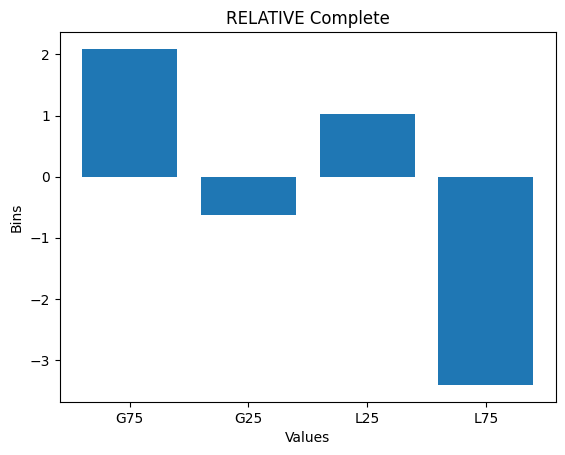

In [286]:
import matplotlib.pyplot as plt
import numpy as np


# Set bin values
G75, G25, L25, L75 = out[1][0], out[0][0], out[0][1], out[1][1]

# Set bin names
bin_names = ['G75', 'G25', 'L25', 'L75']

# Set bin heights
bin_heights = [G75, G25, L25, L75]

# Create horizontal bar graph with bins
plt.bar(bin_names, bin_heights)



# Add axis labels and title
plt.ylabel('Bins')
plt.xlabel('Values')
plt.title("RELATIVE Complete")

# Show plot
plt.show()




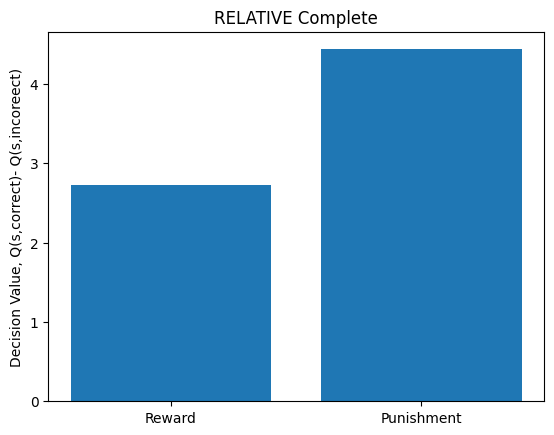

In [287]:
# Set bin values
Reward , Punishment = out[1][0] - out[0][0], out[0][1] - out[1][1]

# Set bin names
bin_names = ['Reward', 'Punishment']

# Set bin heights
bin_heights = [Reward , Punishment]

# Create horizontal bar graph with bins
plt.bar(bin_names, bin_heights)



# Add axis labels and title
plt.ylabel('Decision Value, Q(s,correct)- Q(s,incoreect)')

plt.title("RELATIVE Complete")

# Show plot
plt.show()


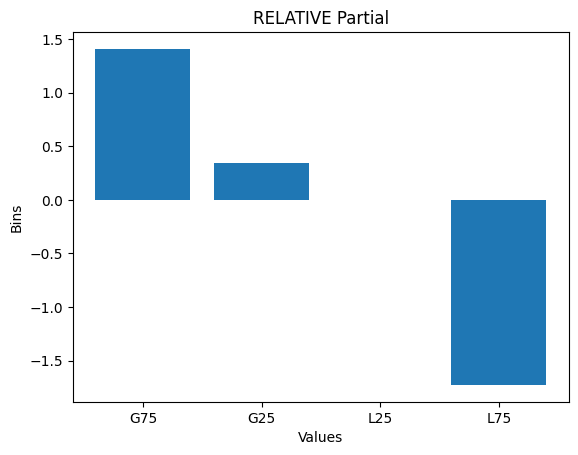

In [288]:
# Set bin values
G75, G25, L25, L75 = out[1][2],out[0][2] , out[0][3], out[1][3]

# Set bin names
bin_names = ['G75', 'G25', 'L25', 'L75']

# Set bin heights
bin_heights = [G75, G25, L25, L75]

# Create horizontal bar graph with bins
plt.bar(bin_names, bin_heights)

# Add axis labels and title
plt.ylabel('Bins')
plt.xlabel('Values')
plt.title("RELATIVE Partial")

# Show plot
plt.show()

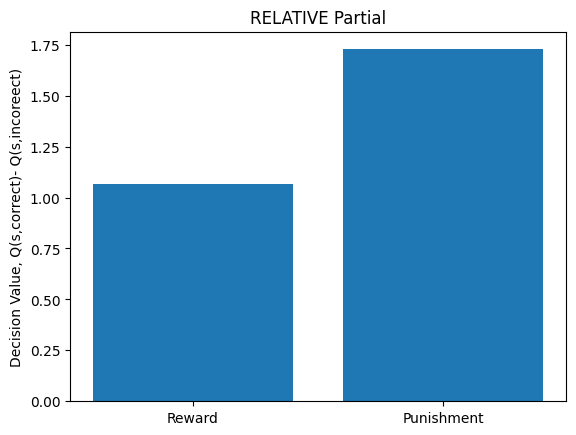

In [289]:

# Set bin values
Reward, Punishment = out[1][2] -out[0][2] , out[0][3] -  out[1][3]

# Set bin names
bin_names = ['Reward', 'Punishment']

# Set bin heights
bin_heights = [Reward, Punishment]

# Create horizontal bar graph with bins
plt.bar(bin_names, bin_heights)

# Add axis labels and title
plt.ylabel('Decision Value, Q(s,correct)- Q(s,incoreect)')

plt.title("RELATIVE Partial")

# Show plot
plt.show()